In [1]:
include("../source/spin-1_XY_ED.jl")

odlro_matrix (generic function with 1 method)

### 1) Variation of overlap for a range of $J_2$

#### I) Scar State

In [26]:
N = 14
J1,J3,D,h = 1.0,0.1,0.1,1.0
n = 1
boundary = "OBC"
use_sparse = false

num_J2::Int64 = 300
J2_list::Vector{Float64} = Vector{Float64}((LinRange(0.00,0.05,num_J2)))
J2_step::Float64 = J2_list[2]-J2_list[1]

overlap_folder = "D:\\IACS_Project\\spin-1_XY\\data\\1D\\spin-1_XY_N=$(N)\\sec_nbr_perturbed\\$(boundary)\\scar_hybridization"
overlap_file = joinpath(overlap_folder,"Sn=$(n)_hybridization_J1=$(round(J1,digits=6))_J3=$(round(J3,digits=6))_D=$(round(D,digits=6))_h=$(round(h,digits=6))_J2step=$(round(J2_step,digits=6)).jld2")
scar_hybrid_file = JLD2.load(overlap_file)
scar_E_matrix = scar_hybrid_file["scar_energy_matrix"]
scar_P_matrix = scar_hybrid_file["scar_overlap_matrix"];

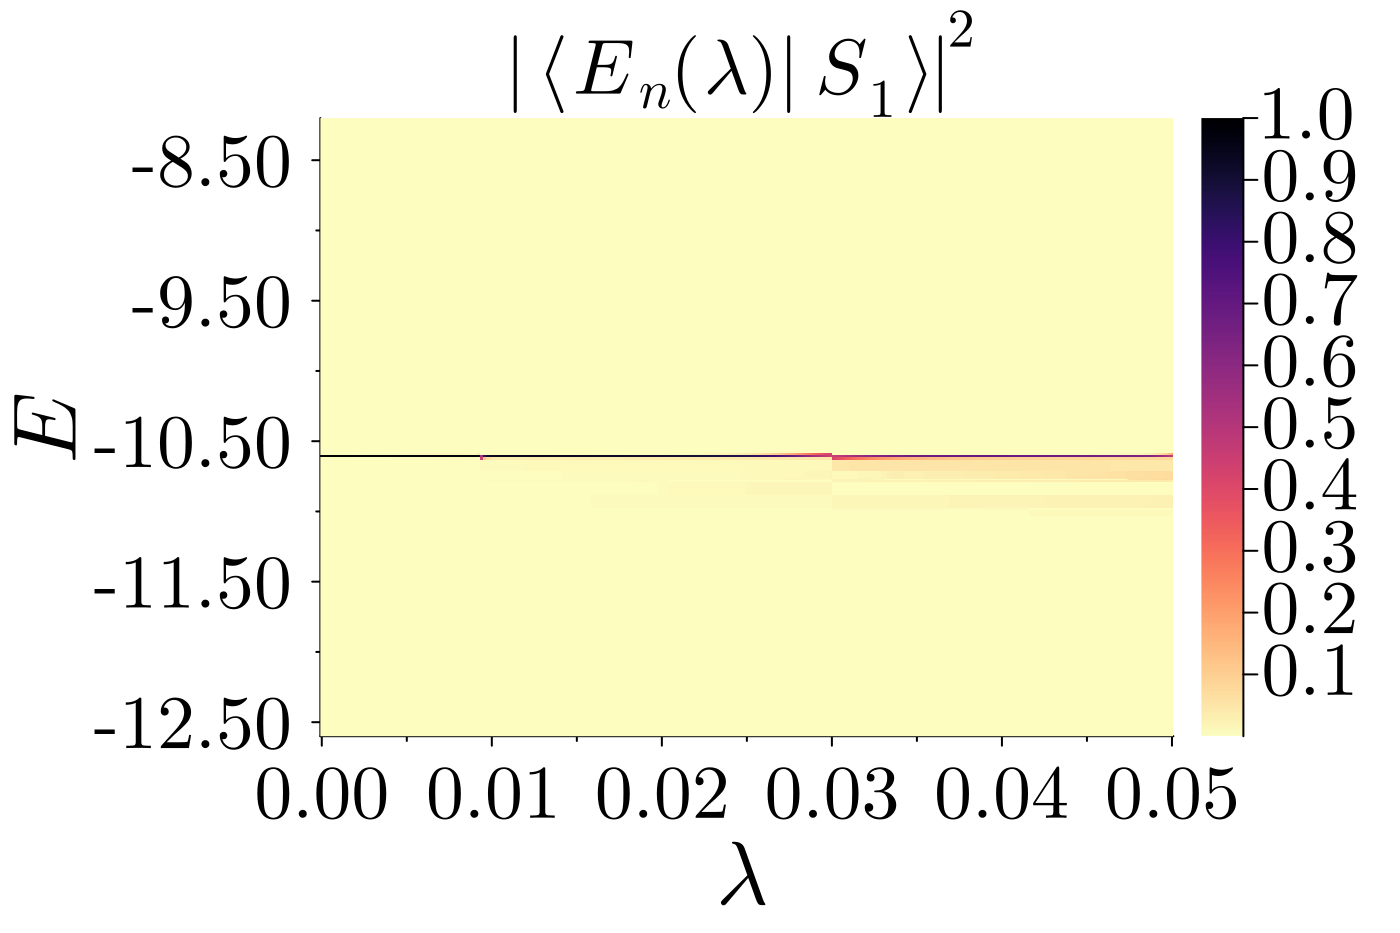

"D:\\IACS_Project\\spin-1_XY\\plots\\1D\\spin-1_XY_N=14\\sec_nbr_perturbed\\OBC\\scar_hybridization\\Sn=1_hybridization_J1=1.0_J3=0.1_D=0.1_h=1.0_L=14.png"

In [28]:
using Plots
using LaTeXStrings
using Plots.PlotMeasures
gr()

plot_size = (700,466.67)
default(fontfamily="Computer Modern")

cmap = reverse(cgrad(:magma))

p = heatmap(J2_list,vec(scar_E_matrix[:,1]),scar_P_matrix,color=cmap,size=plot_size,dpi=200)

plot!(left_margin=2mm,right_margin=9mm,top_margin=3mm,bottom_margin=5mm)
plot!(framestyle=:axis)
plot!(grid=false,gridlinewidth=0.6,gridalpha=0.2,gridcolor=:gray)

xlabel!("\$\\lambda\$",guidefontsize=30) #28
ylabel!("\$E\$",guidefontsize=30) #28
title_text = "\$|\\langle E_n(\\lambda) | S_{$n} \\rangle |^2\$"
title!(title_text,titlefontsize=26) 

x1,x_step,x2 = 0.0,0.01,0.05
# y1,y_step,y2 = -8.75,0.10,-8.50
# y1,y_step,y2 = -6.615,0.010,-6.585
y1,y_step,y2 = -12.5,1,-8.5
xticks = (x1:x_step:x2,[@sprintf("%.2f",x) for x in x1:x_step:x2])
yticks = (y1:y_step:y2,[@sprintf("%.2f",y) for y in y1:y_step:y2])
xminor_ticks = 2
yminor_ticks = 2
plot!(xticks=xticks,yticks=yticks,xminorgrid=false,yminorgrid=false,
      xminorticks=xminor_ticks, yminorticks=yminor_ticks,tickfontsize=24,tick_direction=:out) #22
plot!(ylims=(-12.6,-8.2))
# plot!(ylims=(0.1,1.04))

folder_name = "D:\\IACS_Project\\spin-1_XY\\plots\\1D\\spin-1_XY_N=$(N)\\sec_nbr_perturbed\\$(boundary)\\scar_hybridization"
if !isdir(folder_name)
    mkpath(folder_name)
end

file_path = joinpath(folder_name,"Sn=$(n)_hybridization_J1=$(round(J1,digits=6))_J3=$(round(J3,digits=6))_D=$(round(D,digits=6))_h=$(round(h,digits=6))_L=$(N).png")

display(p)
# savefig(p,file_path)

#### II) Thermal State

In [29]:
N = 14
J1,J3,D,h = 1.0,0.1,0.1,1.0
n = 3
thermal_index = 4
boundary = "OBC"
use_sparse = false

num_J2::Int64 = 300
J2_list::Vector{Float64} = Vector{Float64}((LinRange(0.00,0.05,num_J2)))
J2_step::Float64 = J2_list[2]-J2_list[1]

overlap_folder = "D:\\IACS_Project\\spin-1_XY\\data\\1D\\spin-1_XY_N=$(N)\\sec_nbr_perturbed\\$(boundary)\\thermal_state_hybridization"
overlap_file = joinpath(overlap_folder,"thermal_state_Sn=$(n)+$(thermal_index)_hybridization_J1=$(round(J1,digits=6))_J3=$(round(J3,digits=6))_D=$(round(D,digits=6))_h=$(round(h,digits=6))_J2step=$(round(J2_step,digits=6)).jld2")
thermal_hybrid_file = JLD2.load(overlap_file)
th_E_matrix = thermal_hybrid_file["eig_energy_matrix"]
th_P_matrix = thermal_hybrid_file["eig_overlap_matrix"];

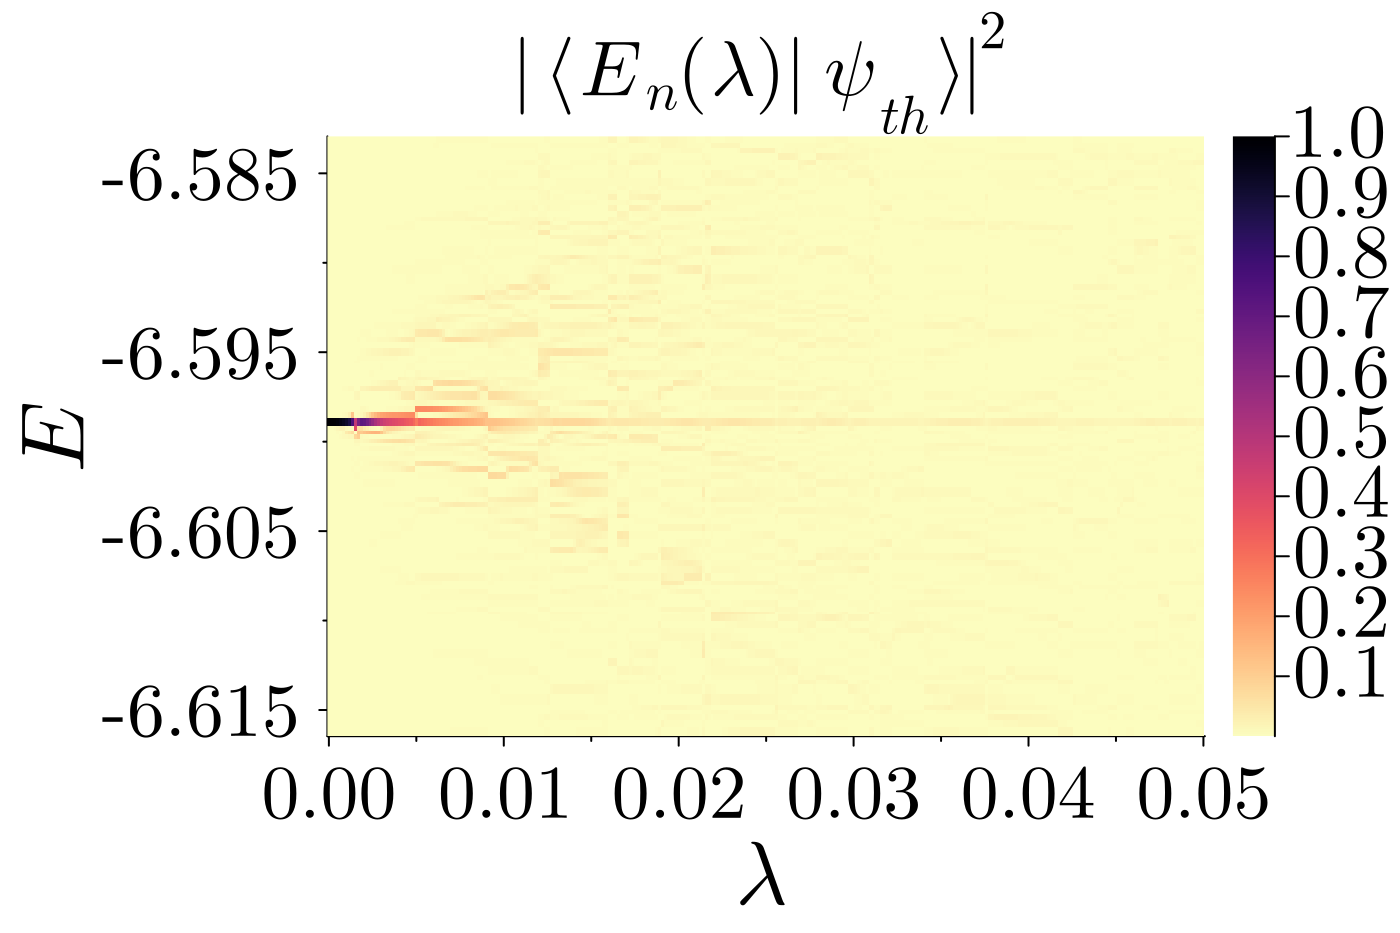

"D:\\IACS_Project\\spin-1_XY\\plots\\1D\\spin-1_XY_N=14\\sec_nbr_perturbed\\OBC\\thermal_state_hybridization\\thermal_state_Sn=3+4_hybridization_J1=1.0_J3=0.1_D=0.1_h=1.0_L=14.png"

In [32]:
using Plots
using LaTeXStrings
using Plots.PlotMeasures
gr()

plot_size = (700,466.67)
default(fontfamily="Computer Modern")

cmap = reverse(cgrad(:magma))

p = heatmap(J2_list,vec(th_E_matrix[:,1]),th_P_matrix,color=cmap,size=plot_size,dpi=200)

plot!(left_margin=3mm,right_margin=5mm,top_margin=4mm,bottom_margin=5mm)
plot!(framestyle=:axis)
plot!(grid=false,gridlinewidth=0.6,gridalpha=0.2,gridcolor=:gray)

xlabel!("\$\\lambda\$",guidefontsize=30)
ylabel!("\$E\$",guidefontsize=30)
title_text = "\$|\\langle E_n(\\lambda) | \\psi_{th} \\rangle |^2\$"
title!(title_text,titlefontsize=26)

x1,x_step,x2 = 0.0,0.01,0.05
# y1,y_step,y2 = 0.2,0.2,1.0
y1,y_step,y2 = -6.615,0.010,-6.585
xticks = (x1:x_step:x2,[@sprintf("%.2f",x) for x in x1:x_step:x2])
yticks = (y1:y_step:y2,[@sprintf("%.3f",y) for y in y1:y_step:y2])
xminor_ticks = 2
yminor_ticks = 2
plot!(xticks=xticks,yticks=yticks,xminorgrid=false,yminorgrid=false,
      xminorticks=xminor_ticks, yminorticks=yminor_ticks,tickfontsize=24,tick_direction=:out) #22
# plot!(ylims=(0.15,1.05))

folder_name = "D:\\IACS_Project\\spin-1_XY\\plots\\1D\\spin-1_XY_N=$(N)\\sec_nbr_perturbed\\$(boundary)\\thermal_state_hybridization"
if !isdir(folder_name)
    mkpath(folder_name)
end

file_path = joinpath(folder_name,"thermal_state_Sn=$(n)+$(thermal_index)_hybridization_J1=$(round(J1,digits=6))_J3=$(round(J3,digits=6))_D=$(round(D,digits=6))_h=$(round(h,digits=6))_L=$(N).png")

display(p)
# savefig(p,file_path)